# Problemas de prueba de hipótesis

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Ejercicio 1

Usted es un nutricionista que investiga dos tipos diferentes de dietas para ver si existe una diferencia significativa en la pérdida de peso después de un mes. Eliges dos grupos aleatorios de personas; un grupo sigue la primera dieta y el otro sigue la segunda. Al final del mes, se registra la pérdida de peso (en kg) de cada persona:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

Con estos datos se busca responder a la siguiente pregunta: ¿Existe una diferencia significativa en la pérdida de peso promedio entre las personas que siguieron la primera dieta y las que siguieron la segunda dieta?

Para sacar conclusiones, siga los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba para comprobar la hipótesis. Puede utilizar la prueba t de Student.
-Analizar las conclusiones.

In [3]:
diets = {
    'Diet 1': [2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5],
    'Diet 2': [3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2]
}

diets_df = pd.DataFrame(diets)
diets_df

,Diet 1,Diet 2
0,2.0,3.0
1,2.5,3.2
2,3.0,3.1
3,2.8,2.9
4,2.3,2.8
5,2.7,3.0
6,2.5,3.2


$ H_0 $ = No existe una diferencia significativa en la pérdida de peso promedio entre la Dieta 1 y la Dieta 2.

$$ H_0 : μ_1 = μ_2 $$

$ H_1 $ = Si existe una diferencia significativa en la pérdida de peso promedio entre la Dieta 1 y la Dieta 2.

$$  H_1 : μ_1 \ne μ_2  $$

<Axes: >

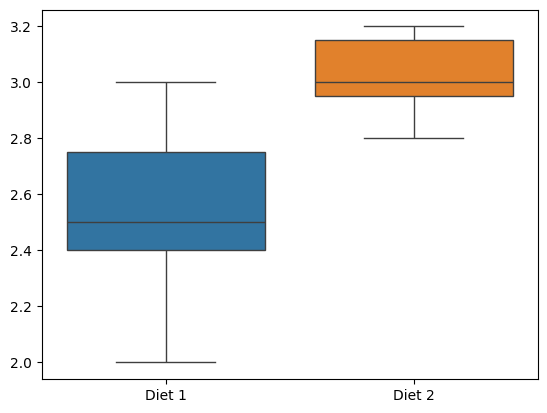

In [6]:
sns.boxplot(data=diets_df)

In [18]:
print(scipy.stats.shapiro(diets_df['Diet 1']).pvalue)
print(scipy.stats.shapiro(diets_df['Diet 2']).pvalue)

0.9635409177367069
0.5905246580529597


Con el test de Shapiro-Wilk, como el P-value es mayor a el nivel de significancia $ α = 0.05 $:
$$ Diet_1 : 0.96 > α $$
$$ Diet_2 : 0.59 > α $$

In [20]:
p = scipy.stats.levene(diets_df['Diet 1'], diets_df['Diet 2'], center='mean').pvalue

if p > 0.05:
  print('Las varianzas son iguales, existe homocedasticidad')
else:
  print('Las varianzas son diferentes')

Las varianzas son iguales, existe homocedasticidad


Con el test de Levene, se obtine que si puede realizarse el T-Test porque se cumplen las condiciones para realizarlo.

In [21]:
scipy.stats.ttest_ind(diets_df['Diet 1'],
                      diets_df['Diet 2'],
                      equal_var=True).pvalue

np.float64(0.004083270191713912)

Como el valor de significancia es de $ α=0.05 $

$$ p ≤ α : 0.004 ≤ 0.05 $$

El valor p es considerablemente menor que el nivel de significancia, por lo que rechazamos la hipótesis nula.

Si existe una diferencia significativa entre las dos dietas, de acuerdo con el grafico de Boxplot, la dieta dos seria la que daria mejores resultados en la perdida de pesos.

## ANOVA

**ANOVA** (*Analysis of Variance - Análisis de variación*) Es una técnica estadística utilizada para comparar las medidas de dos o más grupos. La idea detrás de ANOVA es descomponer la variabilidad total de los datos en dos componentes: variabilidad entre grupos y variabilidad dentro de los grupos:

- **Variabilidad entre grupos**: Esta variabilidad se refiere a las diferencias entre las medias del grupo. Si esta variabilidad es considerablemente mayor que la variabilidad dentro del grupo, podría ser una indicación de que al menos una de las medias del grupo es diferente.
- **Variabilidad dentro del grupo**: Esta variabilidad se refiere a la dispersión de los datos dentro de cada grupo. Si todos los grupos tienen una variabilidad similar, entonces cualquier diferencia notable en las medias de los grupos podría considerarse significativa.

Las hipótesis en ANOVA suelen incluir:

- **Hipótesis nula** ($H₀$): Las medias de todos los grupos son iguales.
- **Hipótesis alternativa** ($H₁$): Al menos una de las medias del grupo es diferente.

Si el resultado de la prueba ANOVA es significativo (por ejemplo, un valor p inferior a un umbral como 0,05), esto sugiere que al menos la media de un grupo es diferente.

## Ejercicio 2

Un agricultor decide probar tres tipos diferentes de fertilizantes para determinar si alguno es superior en términos de producción de maíz. El agricultor planta maíz en 15 parcelas idénticas y utiliza los tres fertilizantes (5 parcelas para cada tipo). Al final de la temporada mide el rendimiento de maíz (en kg) de cada parcela, con el siguiente resultado:

| Fertilizante 1 | Fertilizante 2 | Fertilizante 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

Con estos datos busca responder la siguiente pregunta: ¿Existe una diferencia significativa en el rendimiento promedio del maíz entre los tres tipos de fertilizantes?

Para ayudarte, sigue los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba ANOVA.
-Analizar las conclusiones.
-Si un fertilizante es mejor que otro, ¿cómo podemos saberlo?

In [ ]:
# TODO